

# phishing website detection using data mining
### Problem Statement
Phishing is a form of fraud in which the attacker tries to learn sensitive information such as login credentials or account information by sending as a reputable entity or person in email or other communication channels.<br>
Typically a victim receives a message that appears to have been sent by a known contact or organization. The message contains malicious software targeting the user’s computer or has links to direct victims to malicious websites in order to trick them into divulging personal and financial information, such as passwords, account IDs or credit card details.
### Domain Analysis
Uniform Resource Locator (URL) is created to address web pages. The figure below shows relevant parts in the structure of a typical URL.<br>
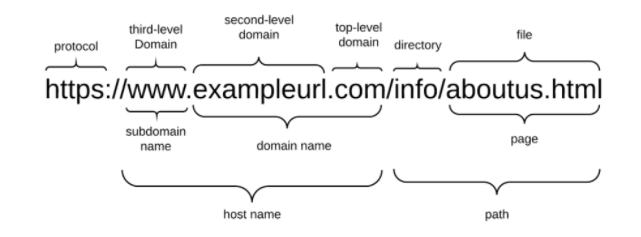

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score



In [2]:
df = pd.read_csv('dataset.csv')

   ##           Data Overview 

In [3]:
# First 5 sample rows of Dataset
df.head() 

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [4]:
df.shape

(11055, 32)

In [5]:
# Name of columns
df.info()
#You can see that there are no missing values in the Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

In [6]:
#Describe statistical information of data
print(df.describe())
#Below stats show that 75 percentile of observations belong to class 1

              index  having_IPhaving_IP_Address  URLURL_Length  \
count  11055.000000                11055.000000   11055.000000   
mean    5528.000000                    0.313795      -0.633198   
std     3191.447947                    0.949534       0.766095   
min        1.000000                   -1.000000      -1.000000   
25%     2764.500000                   -1.000000      -1.000000   
50%     5528.000000                    1.000000      -1.000000   
75%     8291.500000                    1.000000      -1.000000   
max    11055.000000                    1.000000       1.000000   

       Shortining_Service  having_At_Symbol  double_slash_redirecting  \
count        11055.000000      11055.000000              11055.000000   
mean             0.738761          0.700588                  0.741474   
std              0.673998          0.713598                  0.671011   
min             -1.000000         -1.000000                 -1.000000   
25%              1.000000          1.000

In [7]:
df['Abnormal_URL'].value_counts()

 1    9426
-1    1629
Name: Abnormal_URL, dtype: int64

In [8]:
df['Result'].unique()

array([-1,  1], dtype=int64)

In [9]:
#1-> Legitimate
#-1-> Phishing

In [10]:
# Look for missing values
print(df.isnull().sum())        

# No missing values found, so no need to drop or replace any value

index                          0
having_IPhaving_IP_Address     0
URLURL_Length                  0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

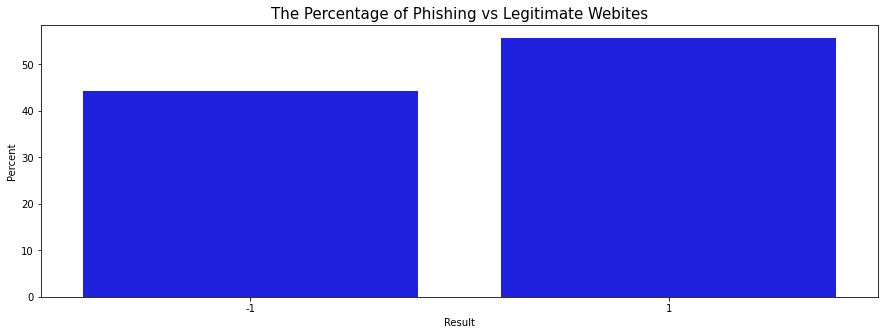

In [11]:
plt.figure(figsize=(15, 5))
ax = sns.barplot(x="Result", y="Result", data=df, estimator=lambda x: len(x) / len(df) * 100, color = 'blue')
ax.set(ylabel="Percent");
ax.set_title('The Percentage of Phishing vs Legitimate Webites', size = 15);
plt.savefig('resultpercentageplot.png', dpi=400, bbox_inches='tight');


<AxesSubplot:xlabel='having_At_Symbol', ylabel='count'>

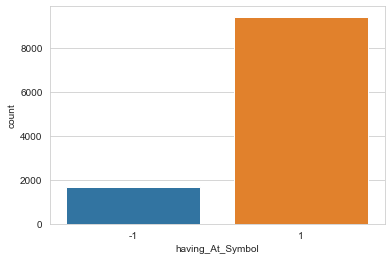

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='having_At_Symbol',data=df)

In [13]:
space_num = 10
for col in df.columns:
    unique_value_list = df[col].unique()
    if len(unique_value_list) > 10:
        print(f'{col} has {df[col].nunique()} unique values\n')
    else:

           print('{0:30} {1} '  .format(col, unique_value_list))
        
# # Y=df[col]
# Y=pd.DataFrame(Y)
# Y.head()        

index has 11055 unique values

having_IPhaving_IP_Address     [-1  1] 
URLURL_Length                  [ 1  0 -1] 
Shortining_Service             [ 1 -1] 
having_At_Symbol               [ 1 -1] 
double_slash_redirecting       [-1  1] 
Prefix_Suffix                  [-1  1] 
having_Sub_Domain              [-1  0  1] 
SSLfinal_State                 [-1  1  0] 
Domain_registeration_length    [-1  1] 
Favicon                        [ 1 -1] 
port                           [ 1 -1] 
HTTPS_token                    [-1  1] 
Request_URL                    [ 1 -1] 
URL_of_Anchor                  [-1  0  1] 
Links_in_tags                  [ 1 -1  0] 
SFH                            [-1  1  0] 
Submitting_to_email            [-1  1] 
Abnormal_URL                   [-1  1] 
Redirect                       [0 1] 
on_mouseover                   [ 1 -1] 
RightClick                     [ 1 -1] 
popUpWidnow                    [ 1 -1] 
Iframe                         [ 1 -1] 
age_of_domain                  [-

#### According to the Data descrition, these are the meaning of the values in the data
<ul>
<li>1 means legitimate</li>
<li>0 is suspicious</li>
<li>-1 is phishing</li>
</ul>

In [14]:
print(df.corr()['Result'].sort_values())   

Domain_registeration_length   -0.225789
Shortining_Service            -0.067966
Abnormal_URL                  -0.060488
HTTPS_token                   -0.039854
double_slash_redirecting      -0.038608
Redirect                      -0.020113
Iframe                        -0.003394
Favicon                       -0.000280
popUpWidnow                    0.000086
index                          0.000978
RightClick                     0.012653
Submitting_to_email            0.018249
Links_pointing_to_page         0.032574
port                           0.036419
on_mouseover                   0.041838
having_At_Symbol               0.052948
URLURL_Length                  0.057430
DNSRecord                      0.075718
Statistical_report             0.079857
having_IPhaving_IP_Address     0.094160
Page_Rank                      0.104645
age_of_domain                  0.121496
Google_Index                   0.128950
SFH                            0.221419
Links_in_tags                  0.248229


In [15]:
# Remove features having correlation coeff. between +/- 0.03
df.drop(['Favicon','Iframe','Redirect',
                'popUpWidnow','RightClick','Submitting_to_email'],axis=1,inplace=True)
print(len(df.columns))

26


<AxesSubplot:>

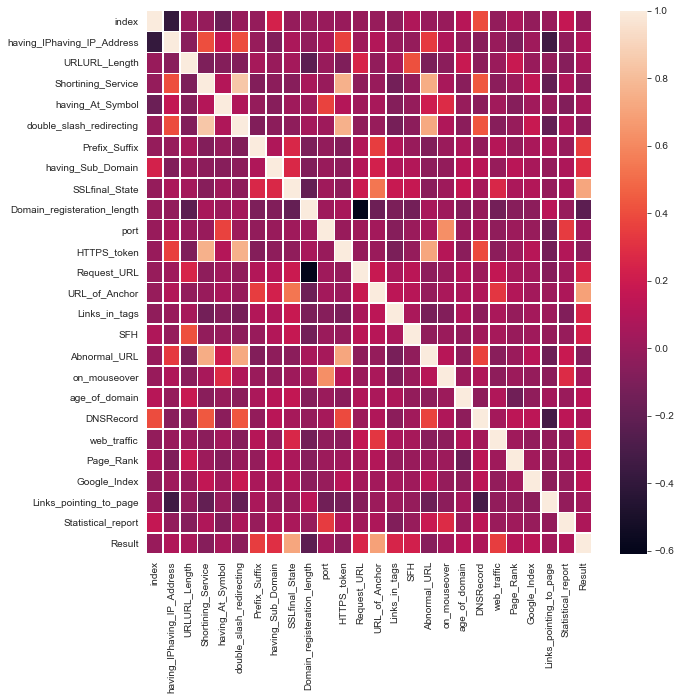

In [16]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), linewidths=.6)

Note that feature popUpWindow and favicon are highly correlated. Looking at the definitions of these features from the Data description, we can say that, for websites where favicon is loaded from external links the pop-up window mostly contains text field. This is said just by seeing the high correlation. Dropping one of the features or not is an experimental decision.

Note that some features are negatively correlated but the color index minimum correlation is upto -0.6. Negative correlations are where one feature marks it as phishing and other don't.

In [17]:
l = [1,-1]
length = len(df)
# df.head()
for i in range(length):
  if(df['having_At_Symbol'].isnull().sum()):
    rand = random.randint(0,1)
    df['having_At_Symbol'][i] = l[rand]
  
df.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,Abnormal_URL,on_mouseover,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,-1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,1,-1,-1,-1,0,-1,1,1,1,1


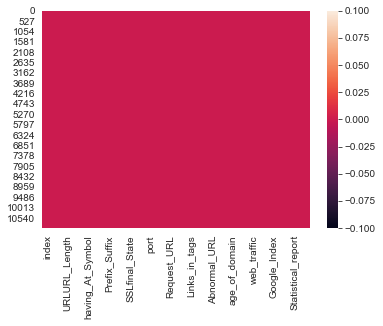

In [18]:
sns.heatmap(df.isnull())
plt.savefig('clean_heatmap.png')

In [19]:
print(df.corr()['Result'].sort_values())

Domain_registeration_length   -0.225789
Shortining_Service            -0.067966
Abnormal_URL                  -0.060488
HTTPS_token                   -0.039854
double_slash_redirecting      -0.038608
index                          0.000978
Links_pointing_to_page         0.032574
port                           0.036419
on_mouseover                   0.041838
having_At_Symbol               0.052948
URLURL_Length                  0.057430
DNSRecord                      0.075718
Statistical_report             0.079857
having_IPhaving_IP_Address     0.094160
Page_Rank                      0.104645
age_of_domain                  0.121496
Google_Index                   0.128950
SFH                            0.221419
Links_in_tags                  0.248229
Request_URL                    0.253372
having_Sub_Domain              0.298323
web_traffic                    0.346103
Prefix_Suffix                  0.348606
URL_of_Anchor                  0.692935
SSLfinal_State                 0.714741


Correlation between all the variables.

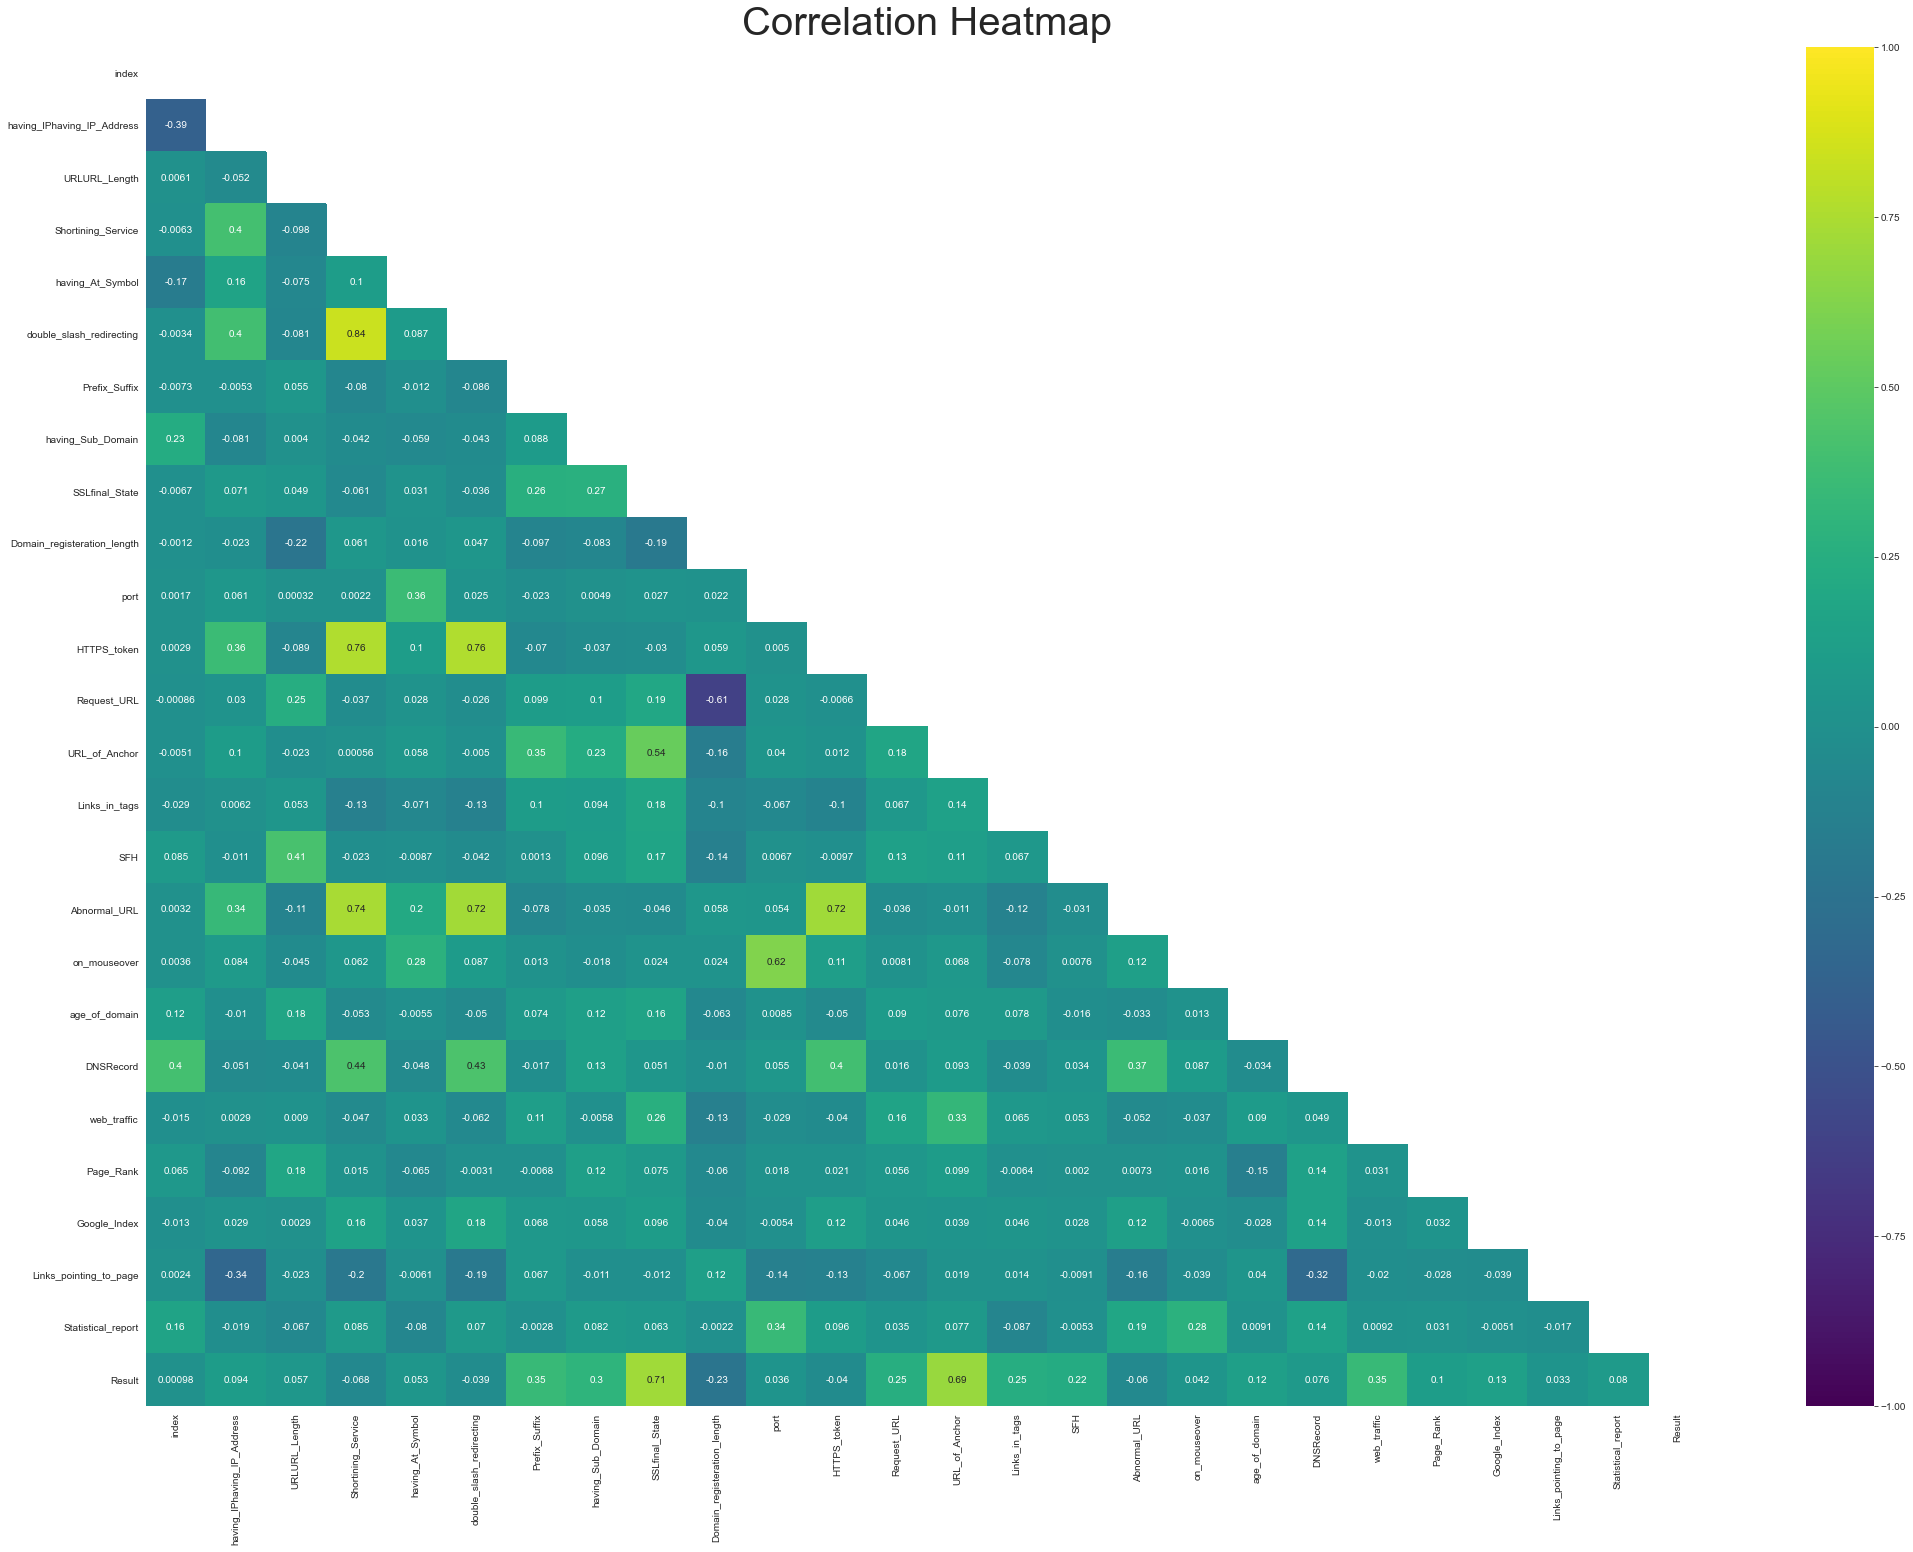

In [20]:
plt.figure(figsize=(35, 25))
corr = df.corr()
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(corr, mask = mask, vmin=-1, vmax=1, annot=True, cmap = 'viridis')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':40}, pad=12);
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')


Variables with the highest correlation with the target variable.

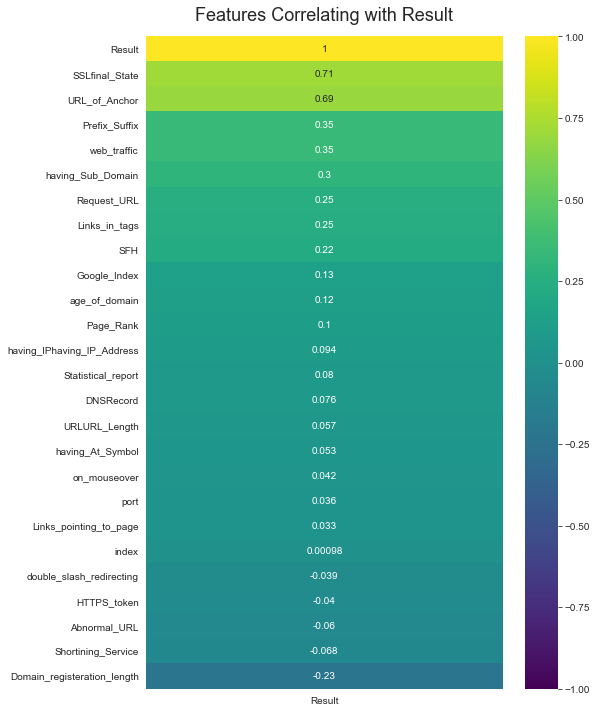

In [21]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['Result']].sort_values(by='Result', ascending=False), vmin=-1, vmax=1, annot=True, cmap = 'viridis')
heatmap.set_title('Features Correlating with Result', fontdict={'fontsize':18}, pad=16);
plt.savefig('heatmapfeaturecorr.png', dpi=300, bbox_inches='tight')

In [22]:
# Replacing -1 with 0 in the target variable
df['Result'] = np.where(df['Result']==-1, 0, df['Result'])
target = df['Result']
features = df.drop(columns=['Result'])

In [23]:
df['Result'].head(20)

0     0
1     0
2     0
3     0
4     1
5     1
6     0
7     0
8     1
9     0
10    1
11    0
12    0
13    0
14    1
15    0
16    0
17    0
18    1
19    1
Name: Result, dtype: int64

In [24]:
df.drop(['index'],axis=1,inplace=True)
print(len(df.columns))

25


In [25]:
df.corr()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,port,...,Abnormal_URL,on_mouseover,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
having_IPhaving_IP_Address,1.000000,-0.052411,0.403461,0.158699,0.397389,-0.005257,-0.080745,0.071414,-0.022739,0.060979,...,0.336549,0.084059,-0.010446,-0.050733,0.002922,-0.091774,0.029153,-0.339065,-0.019103,0.094160
URLURL_Length,-0.052411,1.000000,-0.097881,-0.075108,-0.081247,0.055247,0.003997,0.048754,-0.221892,0.000323,...,-0.106761,-0.045103,0.179426,-0.040823,0.008993,0.183518,0.002902,-0.022987,-0.067153,0.057430
Shortining_Service,0.403461,-0.097881,1.000000,0.104447,0.842796,-0.080471,-0.041916,-0.061426,0.060923,0.002201,...,0.739290,0.062383,-0.052596,0.436064,-0.047074,0.014591,0.155844,-0.198410,0.085461,-0.067966
having_At_Symbol,0.158699,-0.075108,0.104447,1.000000,0.086960,-0.011726,-0.058976,0.031220,0.015522,0.364891,...,0.203945,0.279697,-0.005499,-0.047872,0.032918,-0.064735,0.037061,-0.006080,-0.080357,0.052948
double_slash_redirecting,0.397389,-0.081247,0.842796,0.086960,1.000000,-0.085590,-0.043079,-0.036200,0.047464,0.025060,...,0.723724,0.086635,-0.050107,0.431409,-0.062369,-0.003132,0.178415,-0.194165,0.070390,-0.038608
Prefix_Suffix,-0.005257,0.055247,-0.080471,-0.011726,-0.085590,1.000000,0.087891,0.261391,-0.096799,-0.022546,...,-0.077620,0.012578,0.074116,-0.016556,0.110598,-0.006834,0.067781,0.067423,-0.002763,0.348606
having_Sub_Domain,-0.080745,0.003997,-0.041916,-0.058976,-0.043079,0.087891,1.000000,0.267649,-0.082839,0.004863,...,-0.034908,-0.018082,0.119254,0.125493,-0.005764,0.120730,0.057673,-0.010526,0.081627,0.298323
SSLfinal_State,0.071414,0.048754,-0.061426,0.031220,-0.036200,0.261391,0.267649,1.000000,-0.193622,0.027473,...,-0.046245,0.023586,0.162809,0.050972,0.258768,0.074545,0.096051,-0.011710,0.063411,0.714741
Domain_registeration_length,-0.022739,-0.221892,0.060923,0.015522,0.047464,-0.096799,-0.082839,-0.193622,1.000000,0.022478,...,0.058109,0.023784,-0.062851,-0.010477,-0.134454,-0.059898,-0.039766,0.122672,-0.002212,-0.225789
port,0.060979,0.000323,0.002201,0.364891,0.025060,-0.022546,0.004863,0.027473,0.022478,1.000000,...,0.054126,0.623298,0.008459,0.054849,-0.028543,0.017954,-0.005413,-0.139104,0.343987,0.036419


# Split the dataset

In [26]:
X= df.drop(columns='Result')
X.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,port,...,SFH,Abnormal_URL,on_mouseover,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,-1,-1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,-1,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,-1,-1,1,1,-1,1,-1,1,0,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,-1,1,1,-1,-1,1,-1,1,-1,1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,-1,0,-1,1,1,1


In [27]:
Y=df['Result']
Y=pd.DataFrame(Y)
Y.head()

,Result
0,0
1,0
2,0
3,0
4,1


In [28]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.2,random_state=2)
train_X1,test_X1,train_Y1,test_Y1=train_test_split(X,Y,test_size=0.3,random_state=2)
train_X2,test_X2,train_Y2,test_Y2=train_test_split(X,Y,test_size=0.4,random_state=2)
Accuracy=[]
Duration=[]

In [29]:
print("Split 80/20 "+"Training set has {} samples and ".format(train_X.shape[0])+"Testing set has {} samples.".format(test_X.shape[0]))

print("Split 70/30 "+"Training set has {} samples and ".format(train_X1.shape[0])+"Testing set has {} samples.".format(test_X1.shape[0]))

print("Split 60/40 "+"Training set has {} samples and ".format(train_X2.shape[0])+"Testing set has {} samples.".format(test_X2.shape[0]))

        

Split 80/20 Training set has 8844 samples and Testing set has 2211 samples.
Split 70/30 Training set has 7738 samples and Testing set has 3317 samples.
Split 60/40 Training set has 6633 samples and Testing set has 4422 samples.


In [30]:

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
from sklearn import metrics
from time import perf_counter



In [31]:
def plot_confusion_matrix(test_Y, predict_y):
 C = confusion_matrix(test_Y, predict_y)
 A =(((C.T)/(C.sum(axis=1))).T)
 B =(C/C.sum(axis=0))
 plt.figure(figsize=(20,5))
 labels = [1,2]
 cmap=sns.light_palette("blue")
 plt.subplot(1, 3, 1)
 sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Confusion matrix")
 plt.subplot(1, 3, 2)
 sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Precision matrix")
 plt.subplot(1, 3, 3)
 sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Recall matrix")
 plt.show()

# Lets apply Naive Bayes Classifier and check its accuracy 
## Split 80/20

In [32]:
from sklearn.preprocessing import StandardScaler



In [33]:
from sklearn.naive_bayes import BernoulliNB
start = perf_counter()
classifier = BernoulliNB()
model_2= classifier.fit(train_X, train_Y)


E:\python\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [34]:
y_pred = model_2.predict(test_X)

In [35]:
print("Accuracy:",100*metrics.accuracy_score(test_Y, y_pred))
Accuracy.append(100*accuracy_score(y_pred,test_Y))
duration = perf_counter() - start
duration = round(duration,2)
Duration.append(duration)
print('The time of Naive Bayes Model is: ',Duration[0])

Accuracy: 90.41157847127997
The time of Naive Bayes Model is:  0.09


In [36]:
print(classification_report(test_Y,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       987
           1       0.92      0.91      0.91      1224

    accuracy                           0.90      2211
   macro avg       0.90      0.90      0.90      2211
weighted avg       0.90      0.90      0.90      2211



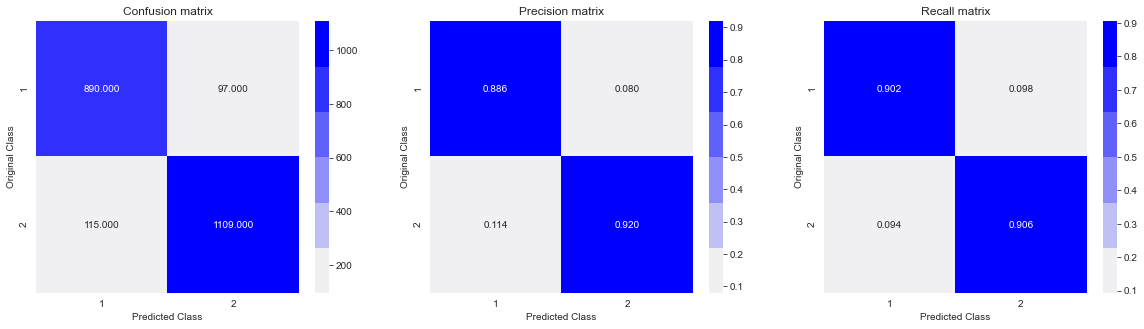

In [37]:
plot_confusion_matrix(test_Y, y_pred)

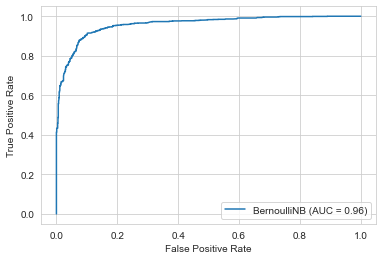

In [38]:
plot_roc_curve(model_2,test_X, test_Y)

## Split 70/30


E:\python\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: 90.32258064516128
The time of Naive Bayes Model is:  0.04

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1460
           1       0.92      0.91      0.91      1857

    accuracy                           0.90      3317
   macro avg       0.90      0.90      0.90      3317
weighted avg       0.90      0.90      0.90      3317



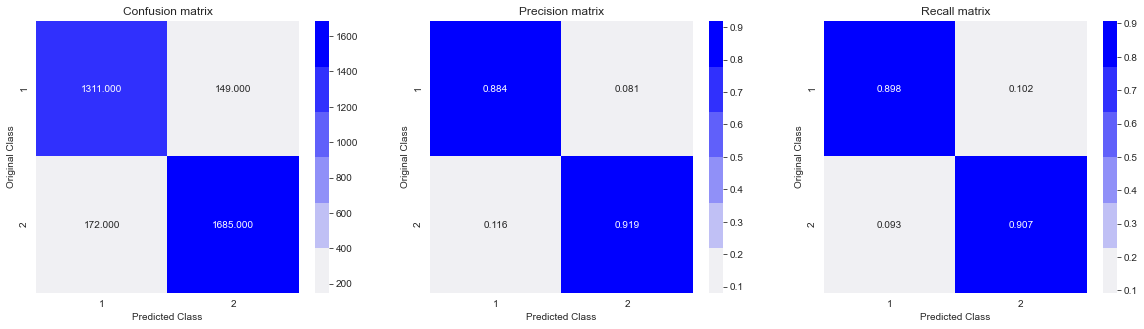

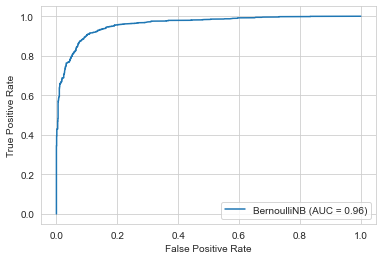

In [39]:
start = perf_counter()
classifier = BernoulliNB()
model_2_1= classifier.fit(train_X1, train_Y1)
y_pred_1 = model_2_1.predict(test_X1)
print("Accuracy:",100*metrics.accuracy_score(test_Y1, y_pred_1))
Accuracy.append(100*accuracy_score(y_pred_1,test_Y1))
duration = perf_counter() - start
duration = round(duration,2)
Duration.append(duration)
print('The time of Naive Bayes Model is: ',Duration[1])
print("\n" + classification_report(test_Y1,y_pred_1))
plot_confusion_matrix(test_Y1, y_pred_1)
plot_roc_curve(model_2_1,test_X1, test_Y1)


## split 60/40 

E:\python\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: 90.34373586612394
The time of Naive Bayes Model is:  0.04

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1953
           1       0.92      0.91      0.91      2469

    accuracy                           0.90      4422
   macro avg       0.90      0.90      0.90      4422
weighted avg       0.90      0.90      0.90      4422



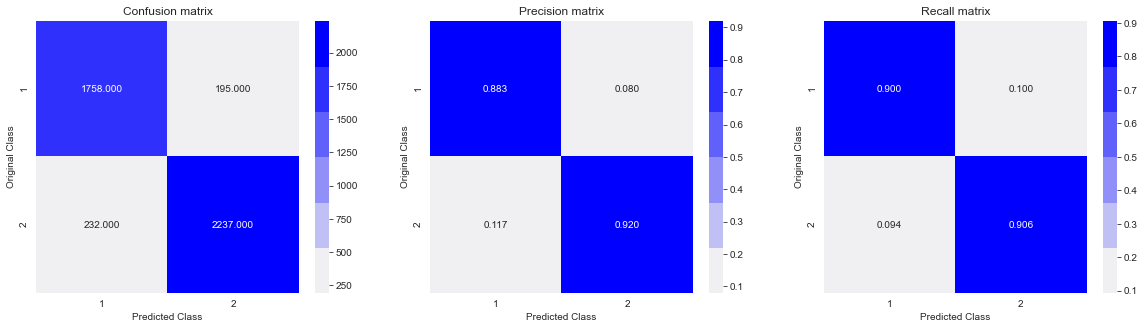

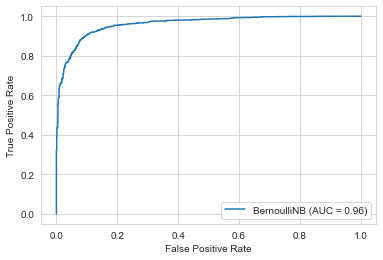

In [40]:
start = perf_counter()
classifier = BernoulliNB()
model_2_2= classifier.fit(train_X2, train_Y2)
y_pred_2 = model_2_2.predict(test_X2)
print("Accuracy:",100*metrics.accuracy_score(test_Y2, y_pred_2))
Accuracy.append(100*accuracy_score(y_pred_2,test_Y2))
duration = perf_counter() - start
duration = round(duration,2)
Duration.append(duration)
print('The time of Naive Bayes Model is: ',Duration[2])
print("\n" + classification_report(test_Y2,y_pred_2))
plot_confusion_matrix(test_Y2, y_pred_2)
plot_roc_curve(model_2_2,test_X2, test_Y2)


In [41]:
model=[ "Naive Bayes 80/20","Naive Bayes 70/30","Naive Bayes 60/40" ]
models_acc = []
for i in range(0,3):
    models_acc.append([model[i],Accuracy[i],Duration[i]])
df_acc = pd.DataFrame(models_acc)
df_acc.columns = ['Model', 'Accuracy', 'Training time (sec)']
df_acc.sort_values(by = 'Accuracy', ascending = False, inplace=False)
df_acc.reset_index(drop = True, inplace=True)
df_acc


,Model,Accuracy,Training time (sec)
0,Naive Bayes 80/20,90.411578,0.09
1,Naive Bayes 70/30,90.322581,0.04
2,Naive Bayes 60/40,90.343736,0.04


#### From above  80/20 perform better so we will use that

# Lets apply Decision Tree Classifier and check its accuracy
### Split 80/20


In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
start = perf_counter()
dtree=DecisionTreeClassifier()
model_3=dtree.fit(train_X,train_Y)

In [44]:
dtree_predict=model_3.predict(test_X)

In [45]:
print('The accuracy of Decision Tree Classifier is: ', 100.0 * accuracy_score(dtree_predict,test_Y))
Accuracy.append(100*accuracy_score(dtree_predict,test_Y))

duration = perf_counter() - start
duration = round(duration,2)

Duration.append(duration)
print('The time of  Decision Tree Classifier is: ', Duration[3])

The accuracy of Decision Tree Classifier is:  96.38172772501132
The time of  Decision Tree Classifier is:  0.11


In [46]:

print(classification_report(dtree_predict,test_Y))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       985
           1       0.97      0.97      0.97      1226

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



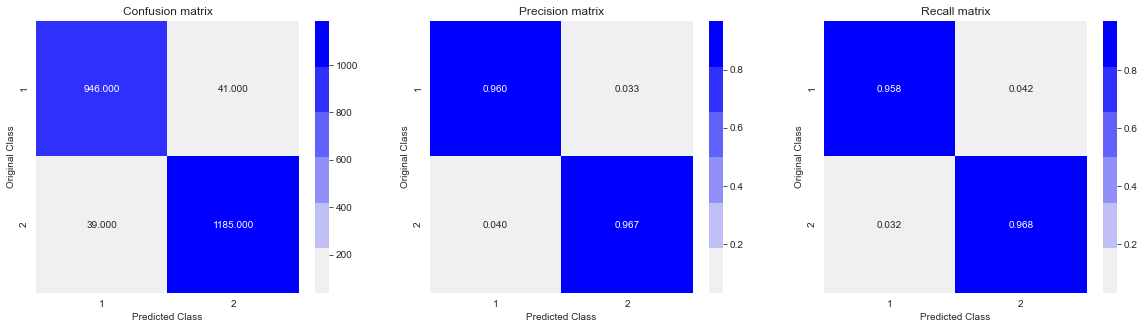

In [47]:
plot_confusion_matrix(test_Y, dtree_predict)

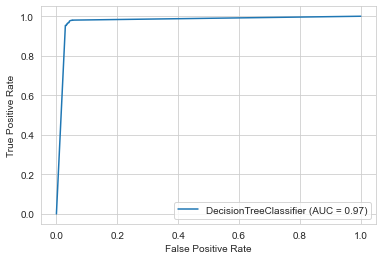

In [48]:
plot_roc_curve(model_3,test_X, test_Y)

### Split 70/30


The accuracy of Decision Tree Classifier is:  96.3521254145312
The time of  Decision Tree Classifier is:  0.06

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1477
           1       0.96      0.97      0.97      1840

    accuracy                           0.96      3317
   macro avg       0.96      0.96      0.96      3317
weighted avg       0.96      0.96      0.96      3317



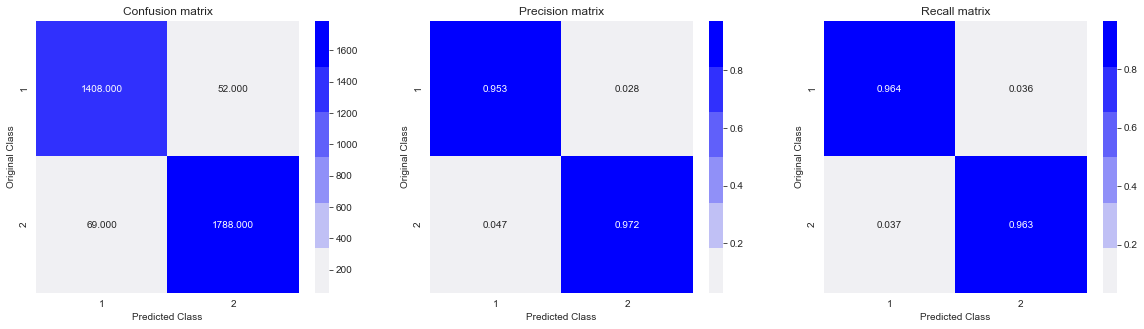

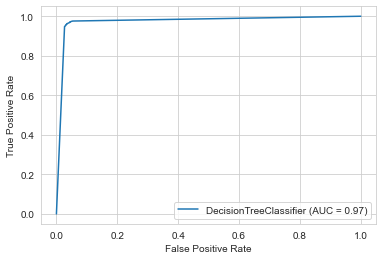

In [49]:
start = perf_counter()
dtree=DecisionTreeClassifier()
model_3_1=dtree.fit(train_X1,train_Y1)
dtree_predict=model_3_1.predict(test_X1)
print('The accuracy of Decision Tree Classifier is: ', 100.0 * accuracy_score(dtree_predict,test_Y1))
Accuracy.append(100*accuracy_score(dtree_predict,test_Y1))

duration = perf_counter() - start
duration = round(duration,2)
Duration.append(duration)
print('The time of  Decision Tree Classifier is: ', Duration[4])
print("\n"+classification_report(dtree_predict,test_Y1))
plot_confusion_matrix(test_Y1, dtree_predict)
plot_roc_curve(model_3_1,test_X1, test_Y1)

### Split 60/40

The accuracy of Decision Tree Classifier is:  95.99728629579376
The time of  Decision Tree Classifier is:  0.06

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1966
           1       0.96      0.97      0.96      2456

    accuracy                           0.96      4422
   macro avg       0.96      0.96      0.96      4422
weighted avg       0.96      0.96      0.96      4422



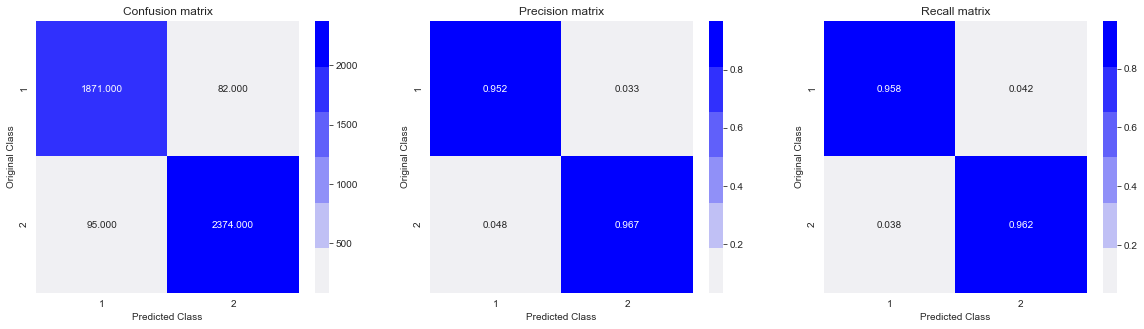

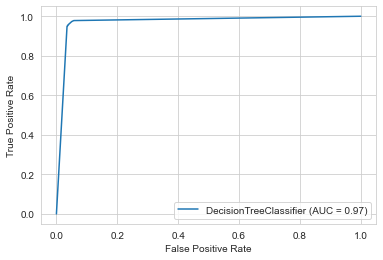

In [50]:
start = perf_counter()
dtree=DecisionTreeClassifier()
model_3_2=dtree.fit(train_X2,train_Y2)
dtree_predict=model_3_2.predict(test_X2)
print('The accuracy of Decision Tree Classifier is: ', 100.0 * accuracy_score(dtree_predict,test_Y2))
Accuracy.append(100*accuracy_score(dtree_predict,test_Y2))

duration = perf_counter() - start
duration = round(duration,2)
Duration.append(duration)
print('The time of  Decision Tree Classifier is: ', Duration[5])
print("\n"+classification_report(dtree_predict,test_Y2))
plot_confusion_matrix(test_Y2, dtree_predict)
plot_roc_curve(model_3_2,test_X2, test_Y2)

In [51]:
model=[ "Decision Tree 80/20","Decision Tree 70/30","Decision Tree 60/40" ]
models_acc = []
for i in range(0,3):
    models_acc.append([model[i],Accuracy[i+3],Duration[i+3]])
df_acc = pd.DataFrame(models_acc)
df_acc.columns = ['Model', 'Accuracy', 'Training time (sec)']
df_acc.sort_values(by = 'Accuracy', ascending = False, inplace=False)
df_acc.reset_index(drop = True, inplace=True)
df_acc

,Model,Accuracy,Training time (sec)
0,Decision Tree 80/20,96.381728,0.11
1,Decision Tree 70/30,96.352125,0.06
2,Decision Tree 60/40,95.997286,0.06


#### from the above 70/30 Split work better

# Lets apply Regression model and check its accuracy
## split 80/20

In [52]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(train_X)
xtest = sc_x.transform(test_X)


In [53]:
from sklearn.linear_model import LogisticRegression
start = perf_counter()
model_5 = LogisticRegression(random_state = 0)
model_5.fit(xtrain, train_Y)

E:\python\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(random_state=0)

In [54]:
y_pred = model_5.predict(test_X)

In [55]:
print('The accuracy of Regression Model is: ' , 100.0 * accuracy_score(y_pred,test_Y))
Accuracy.append(100*accuracy_score(y_pred,test_Y))
duration = perf_counter() - start
duration = round(duration,2)
Duration.append(duration)
print('The time of Regression Model is: ',Duration[6])

The accuracy of Regression Model is:  91.40660334690185
The time of Regression Model is:  0.16


In [56]:
print(classification_report(y_pred,test_Y))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91      1071
           1       0.89      0.95      0.92      1140

    accuracy                           0.91      2211
   macro avg       0.92      0.91      0.91      2211
weighted avg       0.92      0.91      0.91      2211



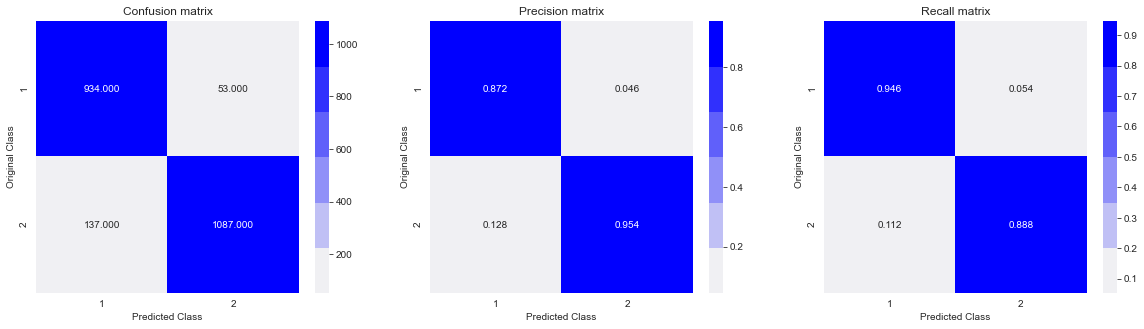

In [57]:
plot_confusion_matrix(test_Y, y_pred)

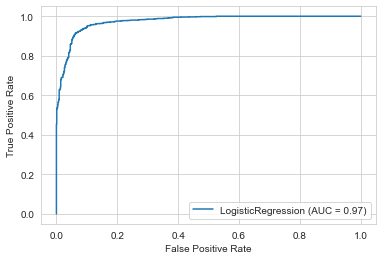

In [58]:
plot_roc_curve(model_5,test_X, test_Y)

### split 70/30

E:\python\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


The accuracy of Regression Model is:  91.43804642749473
The time of Regression Model is:  0.1

              precision    recall  f1-score   support

           0       0.93      0.88      0.91      1554
           1       0.90      0.95      0.92      1763

    accuracy                           0.91      3317
   macro avg       0.92      0.91      0.91      3317
weighted avg       0.92      0.91      0.91      3317



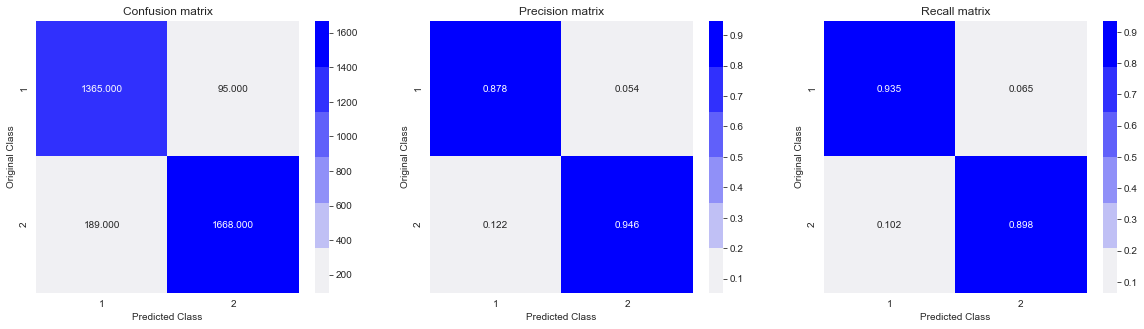

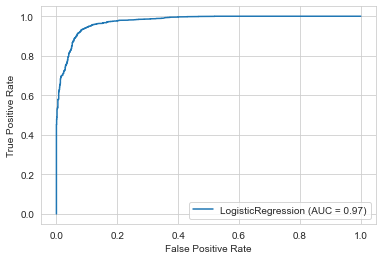

In [59]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(train_X1)
xtest = sc_x.transform(test_X1)
from sklearn.linear_model import LogisticRegression
start = perf_counter()
model_5_1 = LogisticRegression(random_state = 0)
model_5_1.fit(xtrain, train_Y1)
y_pred = model_5_1.predict(test_X1)
print('The accuracy of Regression Model is: ' , 100.0 * accuracy_score(y_pred,test_Y1))
Accuracy.append(100*accuracy_score(y_pred,test_Y1))
duration = perf_counter() - start
duration = round(duration,2)
Duration.append(duration)
print('The time of Regression Model is: ',Duration[7])
print('\n'+ classification_report(y_pred,test_Y1))
plot_confusion_matrix(test_Y1, y_pred)
plot_roc_curve(model_5_1,test_X1, test_Y1)

### split 60/40

E:\python\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


The accuracy of Regression Model is:  91.63274536408865
The time of Regression Model is:  0.08

              precision    recall  f1-score   support

           0       0.93      0.88      0.91      2059
           1       0.90      0.94      0.92      2363

    accuracy                           0.92      4422
   macro avg       0.92      0.91      0.92      4422
weighted avg       0.92      0.92      0.92      4422



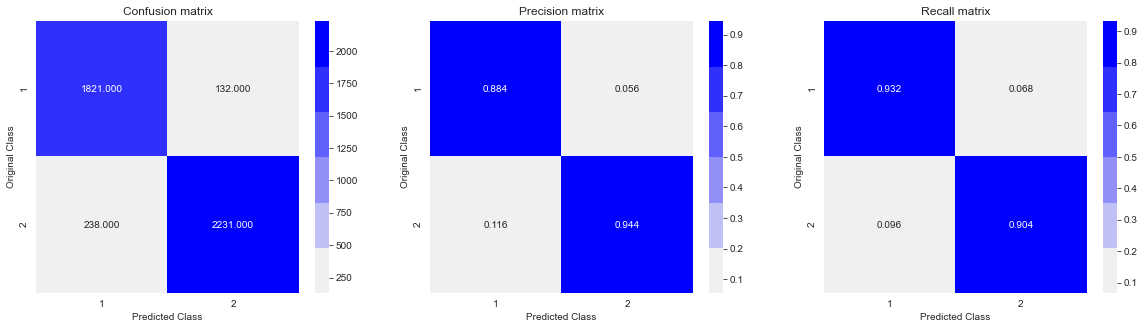

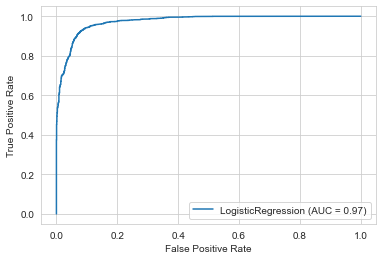

In [60]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain2 = sc_x.fit_transform(train_X2)
xtest2 = sc_x.transform(test_X2)
from sklearn.linear_model import LogisticRegression
start = perf_counter()
model_5_2 = LogisticRegression(random_state = 0)
model_5_2.fit(xtrain2, train_Y2)
y_pred_2 = model_5_2.predict(test_X2)
print('The accuracy of Regression Model is: ' , 100.0 * accuracy_score(y_pred_2,test_Y2))
Accuracy.append(100*accuracy_score(y_pred_2,test_Y2))
duration = perf_counter() - start
duration = round(duration,2)
Duration.append(duration)
print('The time of Regression Model is: ',Duration[8])
print('\n'+ classification_report(y_pred_2,test_Y2))
plot_confusion_matrix(test_Y2, y_pred_2)
plot_roc_curve(model_5_2,test_X2, test_Y2)

In [61]:
model=[ "linear_model 80/20"," linear_model 70/30","linear_model 60/40" ]
models_acc = []
for i in range(0,3):
    models_acc.append([model[i],Accuracy[i+6],Duration[i+6]])
df_acc = pd.DataFrame(models_acc)
df_acc.columns = ['Model', 'Accuracy', 'Training time (sec)']
df_acc.sort_values(by = 'Accuracy', ascending = False, inplace=False)
df_acc.reset_index(drop = True, inplace=True)
df_acc


,Model,Accuracy,Training time (sec)
0,linear_model 80/20,91.406603,0.16
1,linear_model 70/30,91.438046,0.10
2,linear_model 60/40,91.632745,0.08


### from above for Linear_model 60/40 work better

# Comparing Time and Accuracy 

In [62]:
model=["Naive Bayes","Decision Tree","Regression model" ]
models_acc = []
models_acc.append([model[0],Accuracy[0],Duration[0]])
models_acc.append([model[1],Accuracy[4],Duration[4]])
models_acc.append([model[2],Accuracy[8],Duration[8]])
df_acc = pd.DataFrame(models_acc)
df_acc.columns = ['Model', 'Accuracy', 'Training time (sec)']
df_acc.sort_values(by = 'Accuracy', ascending = False, inplace=False)
df_acc.reset_index(drop = True, inplace=True)
df_acc

,Model,Accuracy,Training time (sec)
0,Naive Bayes,90.411578,0.09
1,Decision Tree,96.352125,0.06
2,Regression model,91.632745,0.08


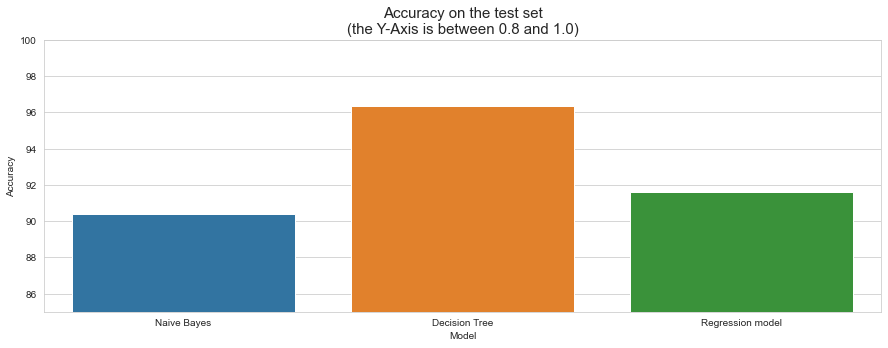

In [63]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'Model', y = 'Accuracy', data = df_acc)
plt.title('Accuracy on the test set\n(the Y-Axis is between 0.8 and 1.0)', fontsize = 15)

plt.ylim(85,100)
plt.show()

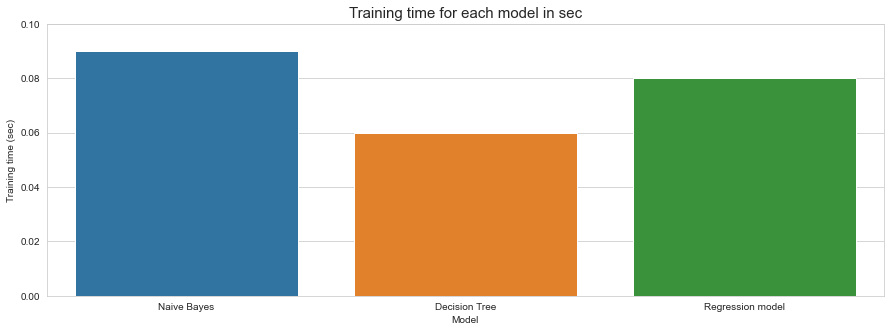

In [64]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'Model', y = 'Training time (sec)', data = df_acc)
plt.title('Training time for each model in sec', fontsize = 15)
plt.ylim(0,0.1)
plt.show()